<a href="https://colab.research.google.com/github/Mif-cl/DL/blob/main/task2dataprocess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import zipfile
import random
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile

In [6]:
!rm -rf image
!rm -rf label

In [7]:
!unzip image-20210112T150225Z-001.zip
!unzip label-20210112T150240Z-001.zip

Archive:  image-20210112T150225Z-001.zip
  inflating: image/chanburi-thailand-11-april-2017-260nw-625760885.jpg  
  inflating: image/cherkasst-ukraina-june-17-2016white-260nw-493473406.jpg  
  inflating: image/chiang-mai-thailand-jan-23-260nw-446130538.jpg  
  inflating: image/cherkasst-ukraina-june-17-2016white-260nw-457842415.jpg  
  inflating: image/chon-buri-thailand-june-24-260nw-1124858255.jpg  
  inflating: image/chanburi-thailand-11-april-2017-260nw-634534409.jpg  
  inflating: image/carr-co-usa-april-12-260nw-622772456.jpg  
  inflating: image/chiang-maithailand-july-11-2015-260nw-444993292.jpg  
  inflating: image/chonburi-thailand-10-march-2017-260nw-610395053.jpg  
  inflating: image/chonburi-thailand-10-march-2017-260nw-610395056.jpg  
  inflating: image/chiang-maithailand-july-11-2015-260nw-296189390.jpg  
  inflating: image/budapest-hungary-december-10-2017-260nw-788912368.jpg  
  inflating: image/cherkasst-ukraina-june-17-2016white-260nw-570386401.jpg  
  inflating: ima

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
from PIL import Image as pil_image
import numpy as np
import json
import os

def plot_ground_truth_boxes(image_file, ground_truth_boxes):
    # Display the image
    plt.figure()
    img_np = mpimg.imread(image_file)
    img = pil_image.fromarray(img_np.astype("uint8"), "RGB")
    img_w, img_h = img.size

    fig,ax = plt.subplots(figsize=(12, 16))
    ax.imshow(img_np)
    ax.axis("off")

    label_to_color_mapping = {}

    for gt in ground_truth_boxes:
        label = gt[0]
        topleft_x, topleft_y,width, height = gt[1],gt[2],gt[3],gt[4]

        if label in label_to_color_mapping:
            color = label_to_color_mapping[label]
        else:
            # Generate a random color. If you want to use a specific color, you can use something like "red".
            color = np.random.rand(3)
            label_to_color_mapping[label] = color

        # Display bounding box
        rect = patches.Rectangle((topleft_x, topleft_y), width, height,
                                 linewidth=2, edgecolor=color, facecolor="none")
        ax.add_patch(rect)

        # Display label
        ax.text(topleft_x, topleft_y - 10, label, color=color, fontsize=20)

    plt.show()

def plot_ground_truth_boxes_jsonl(image_file, jsonl_file):
    image_base_name = os.path.basename(image_file)
    ground_truth_data_found = False
    with open(jsonl_file) as fp:
        for line in fp.readlines():
            line_json = json.loads(line)
            filename = line_json["image_url"]
            if image_base_name in filename:
                ground_truth_data_found = True
                plot_ground_truth_boxes(image_file, line_json["label"])
                break
    if not ground_truth_data_found:
        print("Unable to find ground truth information for image: {}".format(image_file))
  

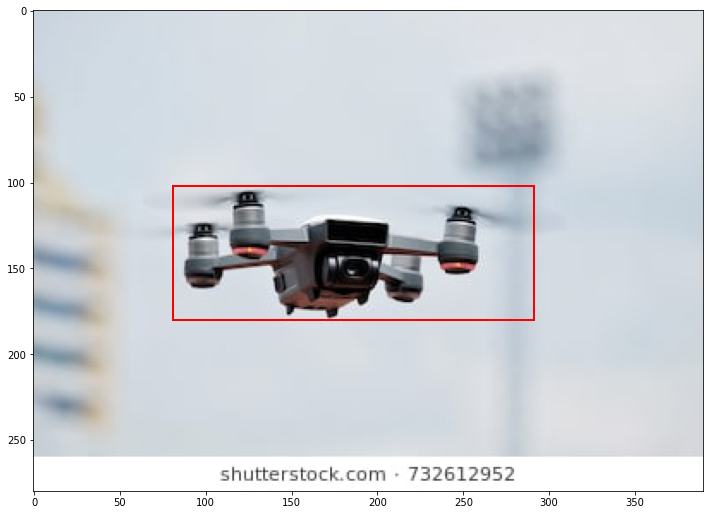

In [53]:
I = np.asarray(image)
fig,ax = plt.subplots(figsize=(12, 16))
ax.imshow(I)
ax.axis("on")
rect = patches.Rectangle((float(x), float(y)), float(w), float(h),
                                 linewidth=2, edgecolor='r', facecolor="none")
ax.add_patch(rect)

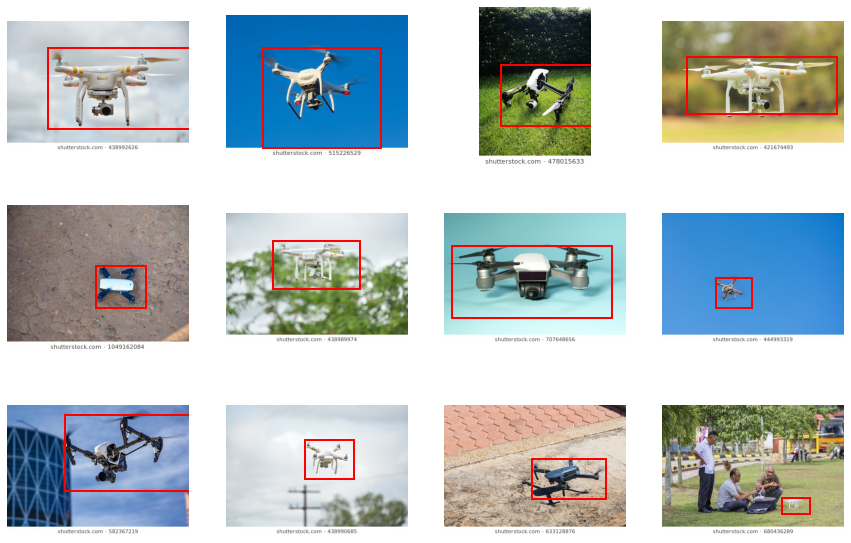

In [56]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

image_path = 'image'
label_path = 'label'

# List to store the images
images = []

# Extract the first 12 images from the directory
count = 0
for filename in os.listdir(image_path):
    if filename.endswith('.jpg') and count < 12:
        image = Image.open(os.path.join(image_path, filename))
        
        # Open the corresponding label file
        label_file = os.path.splitext(filename)[0] + '.txt'
        with open(os.path.join(label_path, label_file), 'r') as file:
            lines = file.readlines()
        
        # Extract the x, y, w, and h values from the label file
        for line in lines:
            id, x, y, w, h = line.strip().split(' ')
            x, y, w, h = float(x), float(y), float(w), float(h)
        
        # Add the image and its x, y, w, and h values to the images list
        images.append((image, x, y, w, h))
        count += 1

# Plot the images in a 3 x 4 grid
fig, axs = plt.subplots(3, 4, figsize=(15, 10))
for i, ax in enumerate(axs.flat):
    if i < len(images):
        ax.imshow(images[i][0])
        rect = patches.Rectangle((images[i][1], images[i][2]), images[i][3], images[i][4], linewidth=2, edgecolor='r', facecolor="none")
        ax.add_patch(rect)
    ax.axis('off')
plt.show()

In [41]:
import os
from PIL import Image
image_path = 'image'
label_path = 'label'
for filename in os.listdir(image_path):
    if filename.endswith('.jpg'):
        # Open the image and extract its width and height
        image = Image.open(os.path.join(image_path, filename))
        label_file = os.path.splitext(filename)[0] + '.txt'
        with open(os.path.join(label_path, label_file), 'r') as file:
            lines = file.readlines()
        for line in lines:
            id, x, y, w, h = line.strip().split(' ')

In [ ]:
import os
from PIL import Image

image_path = 'image'
label_path = 'label'

for filename in os.listdir(image_path):
    if filename.endswith('.jpg'):
        # Open the image and extract its width and height
        image = Image.open(os.path.join(image_path, filename))
        width, height = image.size

        # Open the corresponding label file
        label_file = os.path.splitext(filename)[0] + '.txt'
        with open(os.path.join(label_path, label_file), 'r') as file:
            lines = file.readlines()

        # Modify the contents of the label file
        new_lines = []
        for line in lines:
            id, x, y, w, h = line.strip().split(' ')
            id= str(1)
            x = '{:.6f}'.format((float(x) + (float(w)/2)) / width)
            y = '{:.6f}'.format((float(y) + (float(h)/2))/ height)
            w = '{:.6f}'.format(float(w) / width)
            h = '{:.6f}'.format(float(h) / height)
            new_line = ' '.join([id, x, y, w, h]) + '\n'
            new_lines.append(new_line)

        # Write the modified contents back to the label file
        with open(os.path.join(label_path, label_file), 'w') as file:
            file.writelines(new_lines)

In [ ]:
!zip -r /content/label.zip /content/label

updating: content/label/ (stored 0%)
updating: content/label/bangkok-thailandmay-16-2016-drone-260nw-421674406.txt (deflated 11%)
updating: content/label/bangkok-thailand-june-18-2016-260nw-438993406.txt (deflated 18%)
updating: content/label/almere-netherlands-september-29-2017-260nw-724434277.txt (deflated 18%)
updating: content/label/bangkok-thailand-october-13-2016-260nw-497856562.txt (deflated 11%)
updating: content/label/august-24-2017-labuan-malaysia-260nw-710602138.txt (deflated 8%)
updating: content/label/bangkok-thailand-june-18-2016-260nw-438990739.txt (deflated 13%)
updating: content/label/august-24-2017-labuan-malaysia-260nw-702821572.txt (deflated 13%)
updating: content/label/auckland-new-zealand-may-6-260nw-645228418.txt (deflated 16%)
updating: content/label/bangkok-thailand-june-18-2016-260nw-438990679.txt (deflated 13%)
updating: content/label/bangkok-thailand-june-18-2016-260nw-438993424.txt (deflated 13%)
updating: content/label/bethesda-md-november-10-2017-260nw-75